In [ ]:
import numpy as np

import pandas as pd

from numpy import unique, argmax

from tensorflow.keras.datasets.mnist import load_data

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import Dropout

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import  MaxPool2D

In [ ]:
#loading the MNIST Dataset

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
#printing the shapes

print(train_x.shape ,train_y.shape)

print(test_x.shape , test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
#reshaping train and test sets

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1))

test_x = test_x .reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))

In [ ]:
#printing the shapes

print(train_x.shape, train_y.shape)

print(test_x.shape , test_y.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
#normalizing the pixel values of images

train_x = train_x.astype('float32')/255.0

test_x = test_x.astype('float32')/255.0

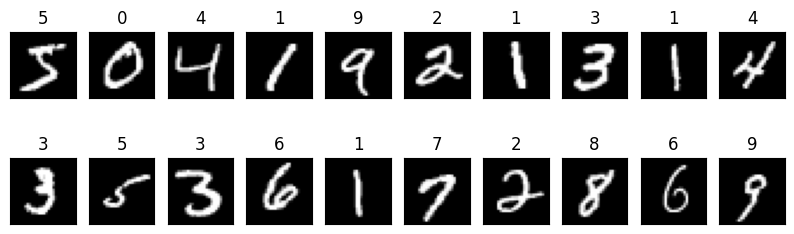

In [ ]:
#plotting images of dataset

fig = plt.figure(figsize = (10,3))

for i in range(20):

     ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
     #ax= fig.add_subplot(2, 10, i+1)
     ax.imshow(np.squeeze(train_x[i]), cmap='gray')
     ax.set_title(train_y[i])

In [ ]:
shape = train_x.shape[1:]

shape

(28, 28, 1)

In [ ]:
#CNN Model

model = Sequential()

#adding convolutional layer

model.add(Conv2D(32, (3,3), activation='relu', input_shape= shape))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(48, (3,3), activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)             

In [ ]:
#compiling model

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

x=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 51s - loss: 0.2559 - accuracy: 0.9217 - val_loss: 0.0530 - val_accuracy: 0.9840 - 51s/epoch - 121ms/step
Epoch 2/10
422/422 - 49s - loss: 0.0806 - accuracy: 0.9749 - val_loss: 0.0396 - val_accuracy: 0.9895 - 49s/epoch - 116ms/step
Epoch 3/10
422/422 - 48s - loss: 0.0600 - accuracy: 0.9807 - val_loss: 0.0330 - val_accuracy: 0.9917 - 48s/epoch - 115ms/step
Epoch 4/10
422/422 - 48s - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.0401 - val_accuracy: 0.9887 - 48s/epoch - 113ms/step
Epoch 5/10
422/422 - 47s - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0281 - val_accuracy: 0.9918 - 47s/epoch - 110ms/step
Epoch 6/10
422/422 - 49s - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0303 - val_accuracy: 0.9910 - 49s/epoch - 116ms/step
Epoch 7/10
422/422 - 47s - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0277 - val_accuracy: 0.9937 - 47s/epoch - 113ms/step
Epoch 8/10
422/422 - 46s - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0275 - val_accuracy: 0.9923 - 46s/epoch - 109

In [ ]:
loss, accuracy= model.evaluate(test_x, test_y)

print(f'Accuracy: {accuracy*100}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0231 - accuracy: 0.9929
Accuracy: 99.2900013923645
